In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import linear_model, metrics 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, mean_squared_error
from sklearn import linear_model, metrics 


In [2]:
# Reading dataset and storing it in a dataframe
dataset = pd.read_csv('US_Accidents_June20.csv')

In [3]:
# To get the info of the training dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [4]:
# Checking For Categorical Features
cols = ['ID','Source','TMC','Severity','Start_Time','End_Time','Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)',
        'Description','Number','Street','Side','City','County','State','Zipcode','Country','Timezone','Airport_Code',
        'Weather_Timestamp','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction',
        'Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction',
        'No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset',
        'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [5]:
print("Unique count of categorical features:")
for i in cols:
  print(i,dataset[i].unique().size)

Unique count of categorical features:
ID 3513617
Source 3
TMC 22
Severity 4
Start_Time 3200042
End_Time 3246120
Start_Lat 1124695
Start_Lng 1113407
End_Lat 375075
End_Lng 383570
Distance(mi) 13476
Description 1780093
Number 40366
Street 176262
Side 3
City 11896
County 1724
State 49
Zipcode 418781
Country 1
Timezone 5
Airport_Code 2002
Weather_Timestamp 546087
Temperature(F) 832
Wind_Chill(F) 975
Humidity(%) 101
Pressure(in) 1023
Visibility(mi) 86
Wind_Direction 25
Wind_Speed(mph) 161
Precipitation(in) 262
Weather_Condition 128
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [6]:
# Droppig Categorical Features
dataset_new1 = dataset.drop(['Country','Turning_Loop'], axis=1)

In [7]:
# To get the info of the new dataset
dataset_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Timezone               object 
 20  Airport_Code           object 
 21  Weather_Timestamp      object 
 22  Temperature(F)    

In [8]:
# dropping useless features
dataset_new2 = dataset_new1.drop(columns=['ID','TMC','Source','Number','End_Lat','End_Lng',
                                    'Description','Distance(mi)', 'End_Time', 'Timezone', 'Weather_Timestamp'], axis=1)

In [9]:
# To get the info of the new dataset
dataset_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Airport_Code           object 
 11  Temperature(F)         float64
 12  Wind_Chill(F)          float64
 13  Humidity(%)            float64
 14  Pressure(in)           float64
 15  Visibility(mi)         float64
 16  Wind_Direction         object 
 17  Wind_Speed(mph)        float64
 18  Precipitation(in)      float64
 19  Weather_Condition      object 
 20  Amenity                bool   
 21  Bump                   bool   
 22  Crossing          

In [10]:
# Handling Missing Data
dataset_new2.isnull().sum()

Severity                       0
Start_Time                     0
Start_Lat                      0
Start_Lng                      0
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Airport_Code                6758
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitation(in)        2025874
Weather_Condition          76138
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Ca

In [11]:
# Dropping Wind_Chill(F), Precipitation(in) features
dataset_new3 = dataset_new2.drop(columns=['Wind_Chill(F)', 'Precipitation(in)'], axis=1)

In [12]:
# To get the info of the new dataset
dataset_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Airport_Code           object 
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Visibility(mi)         float64
 15  Wind_Direction         object 
 16  Wind_Speed(mph)        float64
 17  Weather_Condition      object 
 18  Amenity                bool   
 19  Bump                   bool   
 20  Crossing               bool   
 21  Give_Way               bool   
 22  Junction          

In [13]:
# Corelation
dataset_new3.corr()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
Severity,1.000000,0.047617,0.083705,-0.027275,0.034319,0.038380,-0.006433,0.034959,-0.044494,-0.004671,-0.138368,-0.007747,0.060086,-0.006705,-0.023492,-0.003956,-0.048260,-0.053500,-0.006073,-0.191531
Start_Lat,0.047617,1.000000,-0.013994,-0.426281,0.043792,-0.097927,-0.050276,0.053761,0.042062,0.003300,-0.021648,-0.001637,0.033115,0.000233,-0.000314,-0.000280,0.016133,0.011216,0.009136,-0.091752
Start_Lng,0.083705,-0.013994,1.000000,-0.062612,0.180237,0.149430,-0.047535,0.084480,-0.004948,-0.009044,0.009782,0.017186,-0.061057,-0.002869,-0.023936,0.000794,-0.011009,-0.040357,-0.006283,0.087513
Temperature(F),-0.027275,-0.426281,-0.062612,1.000000,-0.338446,-0.021035,0.181930,-0.006743,-0.003184,0.000312,0.038213,0.000151,-0.006240,0.003883,0.005700,-0.001042,0.003489,0.000846,-0.001218,0.062006
Humidity(%),0.034319,0.043792,0.180237,-0.338446,1.000000,0.111987,-0.383524,-0.145336,-0.003766,-0.002543,-0.051412,0.002729,-0.004308,-0.009505,-0.002668,0.001720,-0.002931,-0.013165,-0.000303,-0.034939
Pressure(in),0.038380,-0.097927,0.149430,-0.021035,0.111987,1.000000,-0.011895,0.001116,0.011444,-0.005200,-0.032661,0.000845,0.030009,-0.010040,0.010748,0.001675,0.020313,-0.008713,-0.000389,-0.010831
Visibility(mi),-0.006433,-0.050276,-0.047535,0.181930,-0.383524,-0.011895,1.000000,0.015562,0.006790,0.004603,0.035228,0.003828,-0.000397,0.011710,0.003072,0.000043,0.007013,0.005939,0.003219,0.029827
Wind_Speed(mph),0.034959,0.053761,0.084480,-0.006743,-0.145336,0.001116,0.015562,1.000000,-0.002495,0.000202,0.009477,0.000131,0.007489,0.000817,-0.004385,-0.001370,-0.000071,0.003431,-0.002342,0.017276
Amenity,-0.044494,0.042062,-0.004948,-0.003184,-0.003766,0.011444,0.006790,-0.002495,1.000000,0.002738,0.117296,0.006551,-0.027440,0.020344,0.048898,0.000288,0.186981,0.033104,0.007892,0.104357
Bump,-0.004671,0.003300,-0.009044,0.000312,-0.002543,-0.005200,0.004603,0.000202,0.002738,1.000000,0.009420,-0.000686,0.000313,0.026550,-0.000549,-0.000095,0.002766,0.014010,0.657610,-0.003889


Text(0.5, 1.0, 'correlation coefficients')

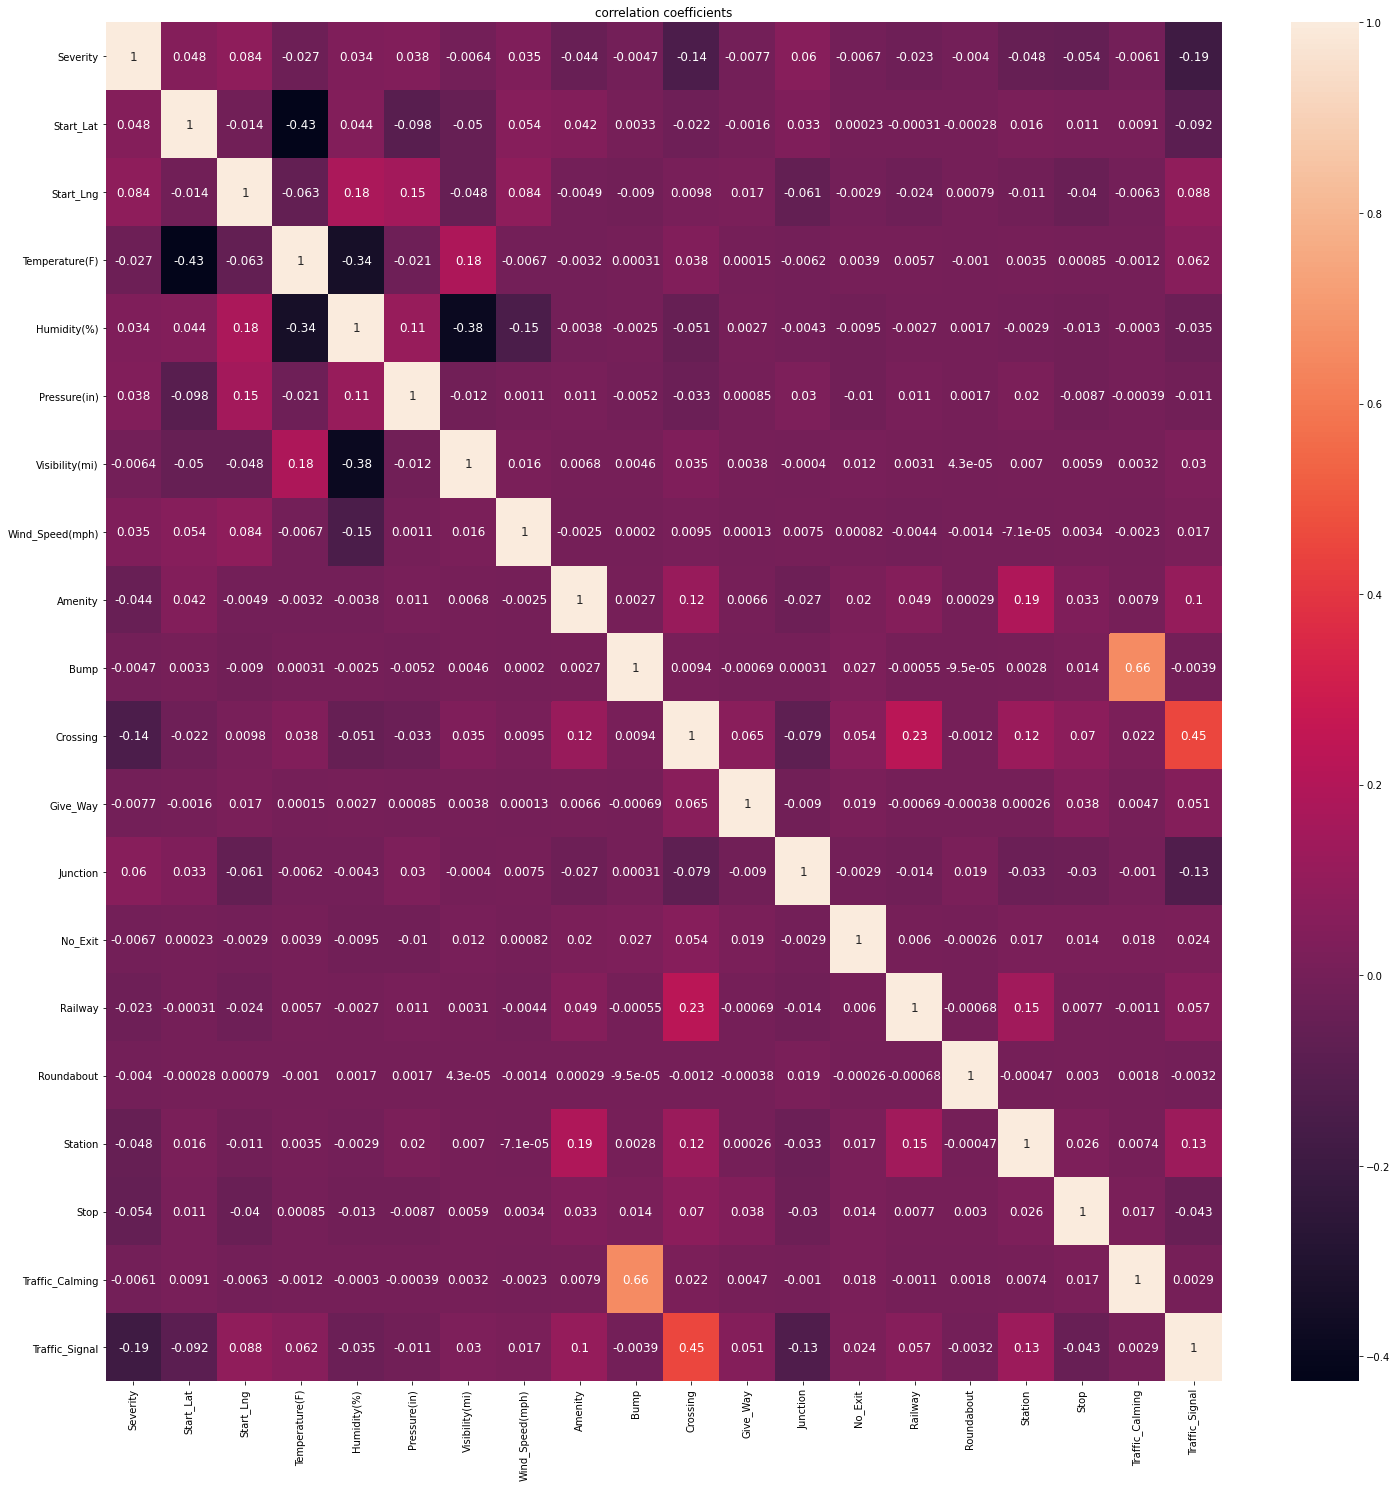

In [14]:
# HeatMap 
plt.figure(figsize=(25,25))
sns.heatmap(dataset_new3.corr(), annot=True, annot_kws={'size': 12})
plt.title('correlation coefficients')

In [15]:
# Drop Features with least realtion to the Target: Severity
dataset_new4 = dataset_new3.drop(columns=['Visibility(mi)','Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], axis=1)

In [16]:
# To get the info of the new dataset
dataset_new4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Airport_Code           object 
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Wind_Direction         object 
 15  Wind_Speed(mph)        float64
 16  Weather_Condition      object 
 17  Amenity                bool   
 18  Crossing               bool   
 19  Junction               bool   
 20  Railway                bool   
 21  Station                bool   
 22  Stop              

In [17]:
# Checking Null value
dataset_new4.isnull().sum()

Severity                      0
Start_Time                    0
Start_Lat                     0
Start_Lng                     0
Street                        0
Side                          0
City                        112
County                        0
State                         0
Zipcode                    1069
Airport_Code               6758
Temperature(F)            65732
Humidity(%)               69687
Pressure(in)              55882
Wind_Direction            58874
Wind_Speed(mph)          454609
Weather_Condition         76138
Amenity                       0
Crossing                      0
Junction                      0
Railway                       0
Station                       0
Stop                          0
Traffic_Signal                0
Sunrise_Sunset              115
Civil_Twilight              115
Nautical_Twilight           115
Astronomical_Twilight       115
dtype: int64

In [18]:
#Dropping Null Value
dataset_new5 = dataset_new4.dropna()

In [19]:
# Checking Null values
dataset_new5.isnull().sum()

Severity                 0
Start_Time               0
Start_Lat                0
Start_Lng                0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Airport_Code             0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Crossing                 0
Junction                 0
Railway                  0
Station                  0
Stop                     0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

In [20]:
# State wise count
dataset_new5.State.value_counts()

CA    676011
TX    290733
FL    232315
SC    146568
NY    144272
NC    142518
IL     94171
MI     89508
PA     88712
GA     78958
OR     78917
VA     78063
MN     75693
AZ     66609
TN     62076
OH     59762
WA     58573
OK     56842
LA     56046
NJ     48941
CO     44322
UT     43547
AL     39658
MD     33364
MA     33304
MO     30606
IN     29650
CT     23170
NE     21457
KY     20563
WI     18492
RI     10443
IA     10215
NV      8739
NH      6827
MS      5678
DE      5448
KS      5167
NM      4934
DC      3760
ME      1991
WV      1850
AR      1761
ID      1731
VT       573
WY       445
MT       438
SD        59
ND        39
Name: State, dtype: int64

In [82]:
dataset_new5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3033519 entries, 2 to 3513616
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Airport_Code           object 
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Wind_Direction         object 
 15  Wind_Speed(mph)        float64
 16  Weather_Condition      object 
 17  Amenity                bool   
 18  Crossing               bool   
 19  Junction               bool   
 20  Railway                bool   
 21  Station                bool   
 22  Stop              

In [21]:
dataset_new5.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph)
count,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06,3.033519e+06
mean,2.332613e+00,3.656764e+01,-9.558495e+01,6.241765e+01,6.414094e+01,2.970493e+01,8.220226e+00
std,5.504645e-01,4.948028e+00,1.720250e+01,1.869854e+01,2.263540e+01,8.657919e-01,5.246204e+00
min,1.000000e+00,2.455527e+01,-1.246238e+02,-2.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.356905e+01,-1.172966e+02,5.000000e+01,4.800000e+01,2.968000e+01,5.000000e+00
50%,2.000000e+00,3.604750e+01,-9.043865e+01,6.400000e+01,6.600000e+01,2.993000e+01,7.000000e+00
75%,3.000000e+00,4.056412e+01,-8.099274e+01,7.630000e+01,8.300000e+01,3.008000e+01,1.150000e+01
max,4.000000e+00,4.900220e+01,-6.711317e+01,1.706000e+02,1.000000e+02,5.774000e+01,9.840000e+02


In [22]:
cols5 = ['Severity','Start_Time','Start_Lat','Start_Lng','Street','Side','City','County','State','Zipcode','Airport_Code',
        'Temperature(F)','Humidity(%)','Pressure(in)','Wind_Direction',
        'Wind_Speed(mph)','Weather_Condition','Amenity','Crossing','Junction',
        'Railway','Station','Stop','Traffic_Signal','Sunrise_Sunset',
        'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [23]:
dataset_new5.shape

(3033519, 28)

In [24]:
dataset_new5.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Airport_Code', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Crossing', 'Junction', 'Railway',
       'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [25]:
dataset_new5.shape

(3033519, 28)

In [26]:
df_SC = dataset_new5.loc[dataset_new5['State'] == "SC"]
df_SC

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
146283,2,2016-11-30 16:19:05,34.318562,-82.663651,Ashley St,L,Iva,Anderson,SC,29655-9004,...,False,False,False,False,False,False,Day,Day,Day,Day
146290,2,2016-11-30 17:58:42,34.202515,-82.134941,Bypass 25 NE,L,Greenwood,Greenwood,SC,29646-3029,...,False,False,False,False,False,False,Night,Night,Day,Day
146296,3,2016-11-30 18:54:18,34.293327,-81.545921,SC Highway 219,R,Newberry,Newberry,SC,29108,...,False,False,False,False,False,False,Night,Night,Night,Night
146299,2,2016-11-30 19:35:05,34.204174,-82.195602,Bypass 72 NW,L,Greenwood,Greenwood,SC,29649-1300,...,False,False,False,False,False,False,Night,Night,Night,Night
146300,2,2016-11-30 19:27:28,33.457443,-81.894531,Hazel Grove Rd,R,Beech Island,Aiken,SC,29842-7685,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512817,2,2019-08-22 09:43:07,34.064830,-81.043470,I-20 W,R,Columbia,Richland,SC,29203,...,False,False,False,False,False,False,Day,Day,Day,Day
3512819,2,2019-08-22 10:13:08,33.765570,-80.967120,I-26 E,R,Swansea,Lexington,SC,29160,...,False,False,False,False,False,False,Day,Day,Day,Day
3512820,2,2019-08-22 09:31:08,32.934290,-80.047350,I-26 W,R,Charleston,Charleston,SC,29406,...,False,False,False,False,False,False,Day,Day,Day,Day
3512828,2,2019-08-22 17:16:16,33.810640,-81.007110,I-26 W,R,Gaston,Calhoun,SC,29053,...,False,False,False,False,False,False,Day,Day,Day,Day


In [27]:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

In [28]:
cols5_toLe = ['Start_Time','Street','Side','City','County','State','Zipcode','Airport_Code','Wind_Direction',
              'Weather_Condition','Amenity','Crossing','Junction','Railway','Station','Stop','Traffic_Signal',
              'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [29]:
for col in cols5_toLe:
    dataset_new5[col] = labelencoder.fit_transform(dataset_new5[col])
    labelencoder = LabelEncoder()
dataset_new5

<ipython-input-29-9058f97369e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new5[col] = labelencoder.fit_transform(dataset_new5[col])


,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,2,1,39.063148,-84.032608,142374,2,11215,318,33,194012,...,0,0,0,0,0,1,1,1,0,0
3,3,2,39.747753,-84.205582,85094,2,2472,1039,33,197841,...,0,0,0,0,0,0,1,0,0,0
4,2,3,39.627781,-84.188354,99443,2,2472,1039,33,198884,...,0,0,0,0,0,1,0,0,0,0
5,3,4,40.100590,-82.925194,159616,2,11079,546,33,188166,...,0,0,0,0,0,0,0,0,0,0
6,2,6,39.758274,-84.230507,108471,2,2472,1039,33,197946,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2,1993196,34.002480,-117.379360,120329,2,8670,1292,3,330414,...,0,0,0,0,0,0,0,0,0,0
3513613,2,1993344,32.766960,-117.148060,85118,2,9040,1349,3,328629,...,0,0,0,0,0,0,0,0,0,0
3513614,2,1993327,33.775450,-117.847790,74835,2,7580,1135,3,332650,...,0,1,0,0,0,0,0,0,0,0
3513615,2,1993327,33.992460,-118.403020,135868,2,2366,901,3,319890,...,0,0,0,0,0,0,0,0,0,0


In [30]:
for col in cols5_toLe:
    df_SC[col] = labelencoder.fit_transform(df_SC[col])
    labelencoder = LabelEncoder()
df_SC


<ipython-input-30-c7d671ab155c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SC[col] = labelencoder.fit_transform(df_SC[col])


,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
146283,2,1813,34.318562,-82.663651,1035,0,140,3,0,26640,...,0,0,0,0,0,0,0,0,0,0
146290,2,1815,34.202515,-82.134941,2434,0,116,23,0,25212,...,0,0,0,0,0,0,1,1,0,0
146296,3,1817,34.293327,-81.545921,12494,1,205,36,0,3628,...,0,0,0,0,0,0,1,1,1,1
146299,2,1819,34.204174,-82.195602,2438,0,116,23,0,25395,...,0,0,0,0,0,0,1,1,1,1
146300,2,1818,33.457443,-81.894531,6350,1,14,1,0,33265,...,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512817,2,95885,34.064830,-81.043470,7127,1,58,40,0,6609,...,0,0,0,0,0,0,0,0,0,0
3512819,2,95891,33.765570,-80.967120,7128,1,285,31,0,5617,...,0,0,0,0,0,0,0,0,0,0
3512820,2,95882,32.934290,-80.047350,7129,1,45,9,0,12446,...,0,0,0,0,0,0,0,0,0,0
3512828,2,95999,33.810640,-81.007110,7129,1,104,8,0,1493,...,0,0,0,0,0,0,0,0,0,0


In [33]:
dataset_new5.shape

(3033519, 28)

In [35]:
dataset_new5.corr()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Severity,1.000000,-0.100475,0.050887,0.093073,-0.048979,0.172663,-0.024603,-0.077977,-0.005083,-0.085642,...,-0.139626,0.059484,-0.025140,-0.048027,-0.052813,-0.190968,0.054974,0.061214,0.067266,0.068455
Start_Time,-0.100475,1.000000,0.030347,-0.058876,-0.124661,-0.015887,0.031026,0.018720,-0.013769,0.032732,...,0.013897,-0.024685,0.005148,-0.003992,0.003538,0.007245,0.034416,0.031843,0.026854,0.022410
Start_Lat,0.050887,0.030347,1.000000,-0.023498,-0.060919,0.003702,0.085071,0.015372,0.215264,-0.070233,...,-0.023433,0.034146,0.001169,0.016075,0.011307,-0.094306,0.041391,0.037066,0.030076,0.030814
Start_Lng,0.093073,-0.058876,-0.023498,1.000000,0.089013,-0.068829,-0.137890,-0.104804,0.384335,-0.933058,...,0.007892,-0.062726,-0.022321,-0.010186,-0.040026,0.087053,-0.067499,-0.078353,-0.083604,-0.090821
Street,-0.048979,-0.124661,-0.060919,0.089013,1.000000,0.081918,-0.005351,-0.019217,0.101905,-0.052658,...,0.019929,0.003729,-0.004007,-0.008031,0.000448,0.036241,-0.017171,-0.022745,-0.026754,-0.029652
Side,0.172663,-0.015887,0.003702,-0.068829,0.081918,1.000000,0.017067,-0.006502,-0.095326,0.046142,...,-0.102402,0.128333,-0.021215,-0.063711,-0.068353,-0.125859,0.024495,0.025576,0.024791,0.022980
City,-0.024603,0.031026,0.085071,-0.137890,-0.005351,0.017067,1.000000,0.186153,-0.089354,0.077820,...,0.056131,0.020919,-0.006509,0.011478,0.026592,-0.005717,0.008299,0.010592,0.010480,0.011652
County,-0.077977,0.018720,0.015372,-0.104804,-0.019217,-0.006502,0.186153,1.000000,-0.058442,0.056957,...,0.032257,-0.003971,-0.009839,0.015025,0.015115,0.002613,-0.002989,0.000527,0.003524,0.005997
State,-0.005083,-0.013769,0.215264,0.384335,0.101905,-0.095326,-0.089354,-0.058442,1.000000,-0.314599,...,0.015374,-0.074446,-0.001333,-0.010072,0.005713,0.057625,-0.040234,-0.046459,-0.050381,-0.048381
Zipcode,-0.085642,0.032732,-0.070233,-0.933058,-0.052658,0.046142,0.077820,0.056957,-0.314599,1.000000,...,0.004752,0.036935,0.018981,0.011326,0.038270,-0.046462,0.058209,0.065635,0.069047,0.075051


Text(0.5, 1.0, 'correlation coefficients')

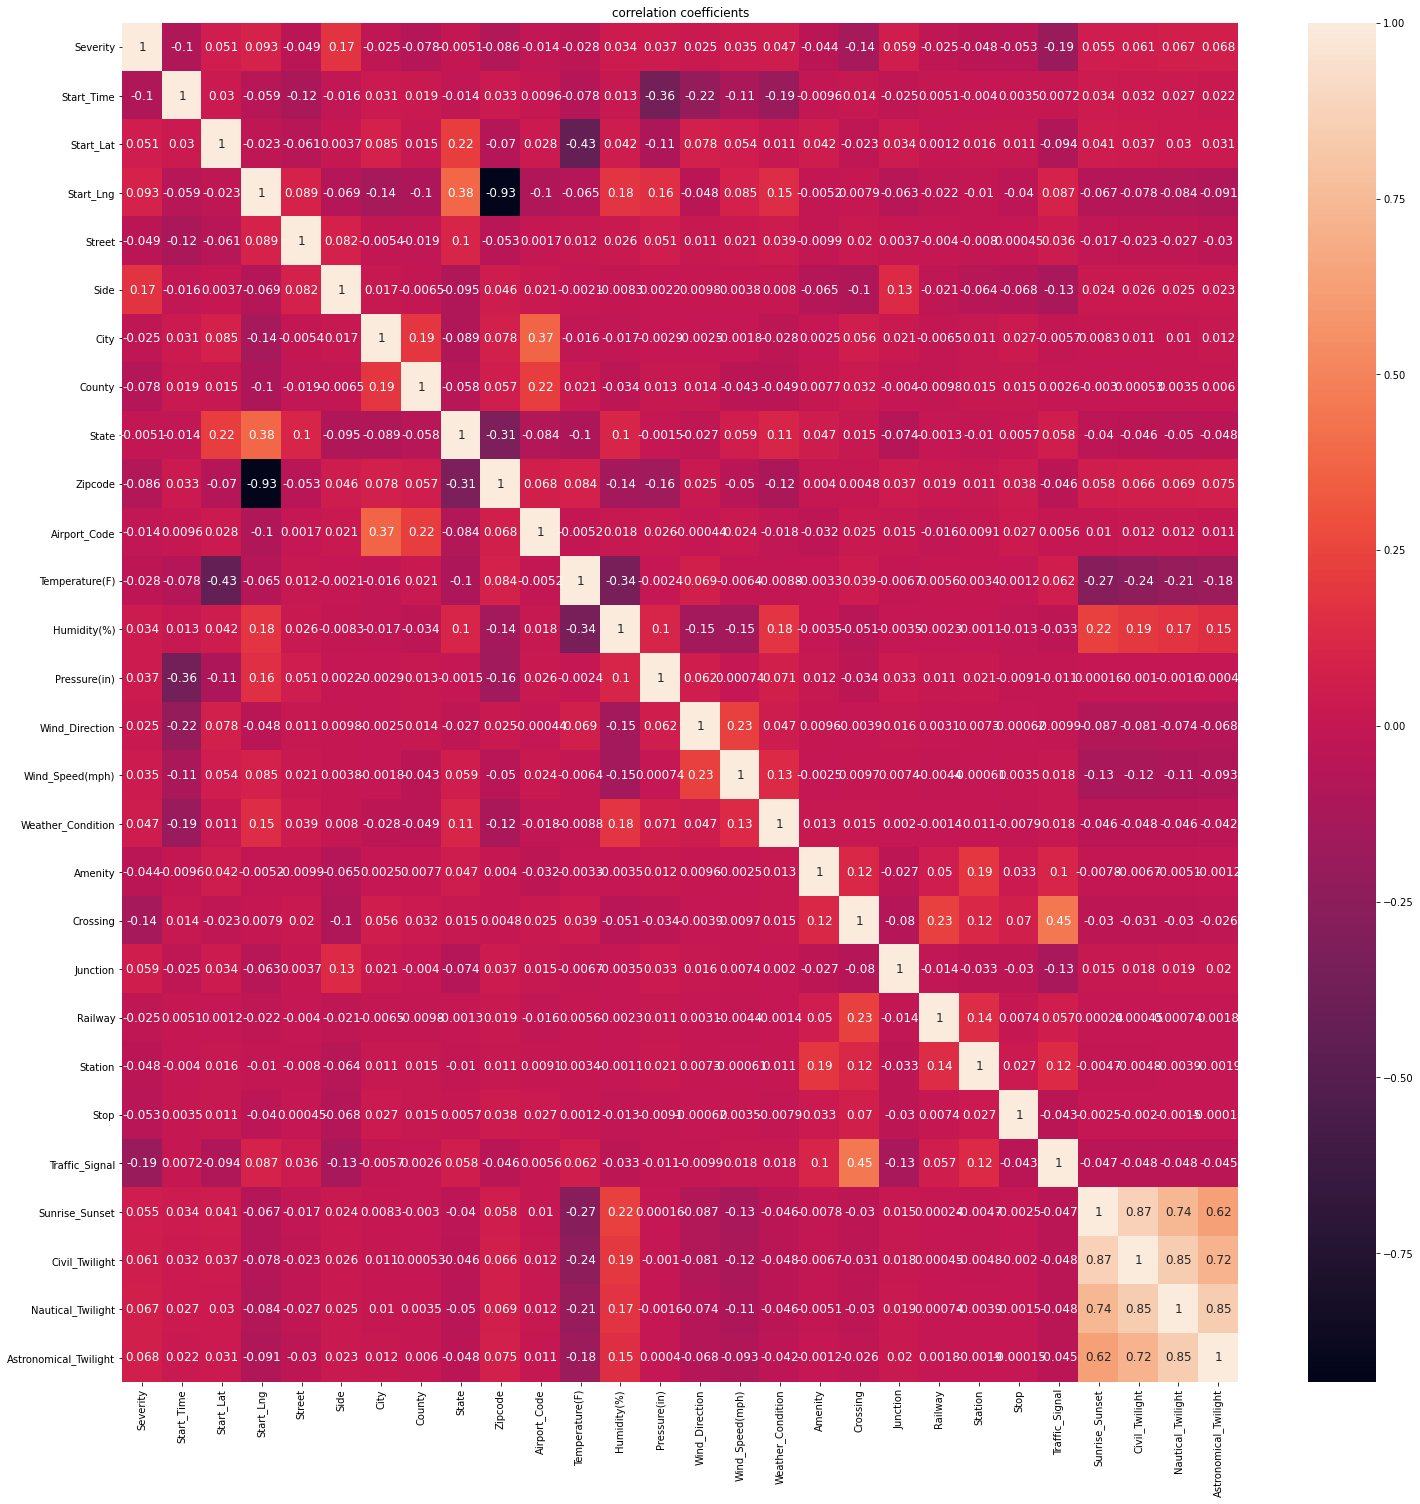

In [63]:
# HeatMap
plt.figure(figsize=(25,25))
sns.heatmap(dataset_new5.corr(), annot=True, annot_kws={'size': 12})
plt.title('correlation coefficients')

In [36]:
df_SC=df_SC.drop(columns=['State'], axis=1)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
X = df_SC.drop(['Severity'], axis=1)
Y = df_SC['Severity']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 4)

In [40]:
X_train[['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',  'Wind_Speed(mph)']] = sc.fit_transform(X_train[['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)']])
X_train

<ipython-input-40-3229db473895>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',  'Wind_Speed(mph)']] = sc.fit_transform(X_train[['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)']])
C:\Users\16232\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,Zipcode,Airport_Code,Temperature(F),...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
922679,102361,0.998413,-0.962282,2255,1,287,22,29264,28,1.310097,...,1,0,0,0,0,1,0,0,0,0
1771817,48661,-0.385371,0.083302,10155,0,310,31,6203,8,0.993110,...,0,0,0,0,0,0,0,0,0,0
2425817,5663,0.007406,0.255252,1841,1,25,40,325,23,1.360814,...,0,0,0,0,0,0,0,0,0,0
1065410,92781,0.292647,0.105712,9911,1,319,19,6419,23,0.232341,...,0,0,0,0,0,0,0,0,0,0
916818,113873,0.328577,1.741720,14715,1,73,16,17259,41,-0.718620,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072367,27869,1.158897,-0.619713,7140,1,276,42,8718,52,-0.465031,...,0,0,0,0,0,0,0,0,0,0
2924305,135082,1.200136,-1.081823,9620,1,291,22,29546,26,-0.718620,...,0,0,0,0,0,0,0,0,0,0
2319016,14489,-1.935219,1.150276,7129,1,45,9,12446,11,0.479591,...,0,1,0,0,0,0,0,0,0,0
2160827,25996,1.328893,-0.919430,5735,1,158,22,11137,28,-2.176761,...,0,0,0,0,0,0,1,0,0,0


In [41]:
X_test[['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',  'Wind_Speed(mph)']] = sc.fit_transform(X_test[['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)']])
X_test

<ipython-input-41-54f7955027be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',  'Wind_Speed(mph)']] = sc.fit_transform(X_test[['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)']])
C:\Users\16232\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,Zipcode,Airport_Code,Temperature(F),...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2018866,33018,-0.015616,0.895854,7126,1,18,30,183,31,-0.802499,...,0,0,0,0,0,0,1,1,1,1
784893,116924,0.995351,-0.678301,8711,1,192,42,11635,52,-1.030475,...,0,0,0,0,0,0,0,0,0,0
836169,106274,-0.080348,0.271340,5100,0,25,40,481,23,0.426040,...,0,0,0,0,0,0,0,0,0,0
1225653,75655,-1.077230,1.785584,3369,1,105,21,13025,25,0.236060,...,0,0,0,0,0,0,0,0,0,0
2734298,140106,0.949717,-1.180479,465,0,79,39,24533,38,-0.080574,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867714,108927,0.525422,0.815465,6580,1,143,12,31133,31,-0.333881,...,0,0,0,0,0,0,1,1,1,1
602406,131764,-0.824917,-0.459133,7127,1,2,1,32121,2,-0.017247,...,0,0,0,0,0,0,0,0,0,0
901730,112280,0.017369,0.605679,7126,1,35,27,550,9,-0.713841,...,0,0,0,0,0,0,0,0,0,0
1512024,60031,0.915753,-0.975523,7141,1,115,22,22034,26,-0.903821,...,0,0,0,0,0,0,0,0,0,0


In [178]:
clf = DecisionTreeClassifier(random_state=42)

# Train & Test
clf.fit(X_train, Y_train)
Y_pred= clf.predict(X_test)

acc_DT = accuracy_score(Y_test, Y_pred)
print("accuracy score",acc_DT)

accuracy score 0.8602150537634409


Confusion matrix, without normalization
[[    0    25     0     0]
 [    0 27628  1469     0]
 [    0  2480  4795     0]
 [    0    84   161     0]]
Normalized confusion matrix
[[0.         1.         0.         0.        ]
 [0.         0.9495137  0.0504863  0.        ]
 [0.         0.34089347 0.65910653 0.        ]
 [0.         0.34285714 0.65714286 0.        ]]


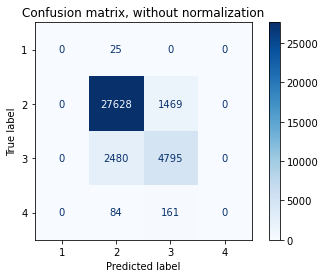

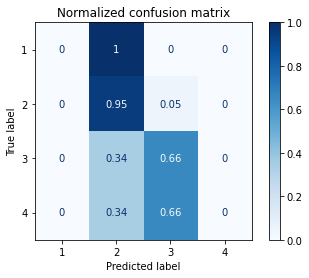

In [131]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [177]:
clf=RandomForestClassifier(n_estimators=100, bootstrap=False, min_samples_split=400, min_samples_leaf=100, n_jobs=-1, random_state=40)

clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

acc_RDF = accuracy_score(Y_test, Y_pred)
print("accuracy score",acc_RDF)

accuracy score 0.8848589050816004


Confusion matrix, without normalization
[[    0    25     0     0]
 [    0 27628  1469     0]
 [    0  2480  4795     0]
 [    0    84   161     0]]
Normalized confusion matrix
[[0.         1.         0.         0.        ]
 [0.         0.9495137  0.0504863  0.        ]
 [0.         0.34089347 0.65910653 0.        ]
 [0.         0.34285714 0.65714286 0.        ]]


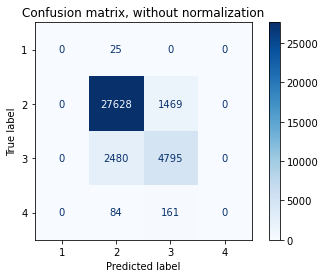

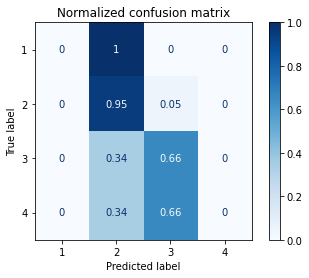

In [133]:
# Plot confusion matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [144]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 1, max_iter=500)
classifier_LR.fit(X_train, Y_train)

LogisticRegression(max_iter=500, random_state=1)

In [139]:
# Initialize an empty list for storing the Accuracy for each algorithm
accuracy_list = []
# Initialize an empty list for storing the Mean Squared Error for each algorithm
MeanSquaredError_list = []

In [146]:
Y_pred = classifier_LR.predict(X_test)

In [147]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : ')
print(cm)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_LR = accuracy_score(Y_test, Y_pred)
print('Logistic Regression Classifier- Accuracy Score : ', acc_LR)
# Append to the accuracy list
accuracy_list.append(acc_LR)

Confusion Matrix : 
[[    0    25     0     0]
 [    0 29097     0     0]
 [    0  7275     0     0]
 [    0   245     0     0]]

Linear Regression Classifier- Accuracy Score :  0.7940887506140495


In [154]:
type(y_pred)

numpy.ndarray

In [160]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [162]:

Y_pred = classifier_KNN.predict(X_test)

In [165]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : ')
print(cm)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_KNN = accuracy_score(Y_test, Y_pred)
print('K-Nearest Neighbors Classifier- Accuracy Score : ', acc_KNN)
# Append to the accuracy list
accuracy_list.append(acc_KNN)

Confusion Matrix : 
[[    1    23     1     0]
 [    6 26269  2801    21]
 [    0  2998  4266    11]
 [    1   112   110    22]]

K-Nearest Neighbors Classifier- Accuracy Score :  0.833961028328148


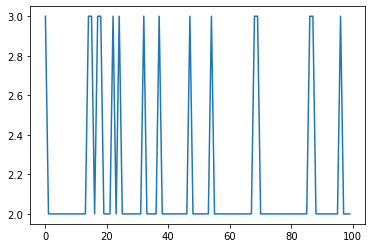

In [166]:
import matplotlib.pyplot as plt
plt.plot(Y_pred[:100])

In [168]:
type(Y_test)

pandas.core.series.Series

In [170]:
Y_test2 = Y_test.values
type(Y_test2)

numpy.ndarray

In [171]:
Y_test2[:100]

array([3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

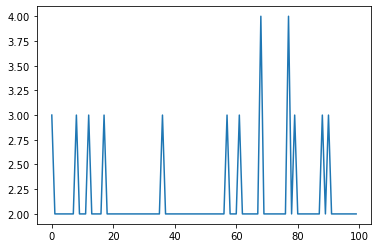

In [172]:
plt.plot(Y_test2[:100])

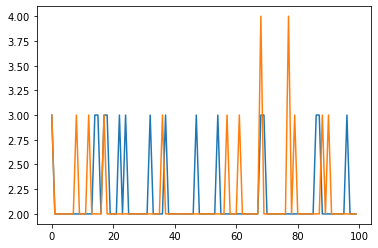

In [173]:
plt.plot(Y_pred[:100])
plt.plot(Y_test2[:100])

In [174]:
mse_KNN = metrics.mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error:', mse_KNN)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_KNN)

Mean Squared Error: 0.17722831723159216


In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [185]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, Y_train)

GaussianNB()

In [187]:
Y_pred = classifier_NB.predict(X_test)
# print y_pred
print(Y_pred)

[2 2 2 ... 2 2 2]


In [189]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : ')
print(cm)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_NB = accuracy_score(Y_test, Y_pred)
print('Naive Bayes Classifier- Accuracy Score : ', acc_NB)

Confusion Matrix : 
[[    0    23     1     0]
 [    0 28268   951     0]
 [    0  5924  1219     0]
 [    0   229    27     0]]

Naive Bayes Classifier- Accuracy Score :  0.8047322744391682


In [49]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train[:10000], Y_train[:10000])


SVC(kernel='linear', random_state=0)

In [44]:
Y_pred = classifier_SVM.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(accuracy_score(Y_test, Y_pred))

0.7864472463293488


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : ')
print(cm)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_SVM = accuracy_score(Y_test, Y_pred)
print('SVM- Accuracy Score : ', acc_SVM)

Confusion Matrix : 
[[    0    23     2     0]
 [    0 28360   703    34]
 [    0  6810   457     8]
 [    0   217    28     0]]

SVM- Accuracy Score :  0.7864472463293488
